In [1]:
        import tensorflow as tf  
        from tensorflow import keras
        import cv2
        import numpy as np

        (x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

        x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
        x_test = x_test/255.0 

In [2]:
keras.backend.clear_session()

In [3]:
model=tf.keras.Sequential()

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train / 255.
x_test = x_test / 255.


In [5]:
encoder =Sequential(
[
 Flatten(input_shape=(28, 28)),  # Flatten the input image
    Dense(256, activation='relu'), # Hidden layer
    Dense(128, activation='relu'), # Hidden layer
    Dense(64, activation='relu') ,
    Dense(32, activation='relu')  # Bottleneck layer , optional
])


In [6]:
decoder=Sequential([
    
    Dense(64, activation='relu'),  # Hidden layer
    Dense(128, activation='relu'), # Hidden layer
    Dense(256, activation='relu'), # Hidden layer
    Dense(784, activation='sigmoid'), # Output layer
    Reshape((28, 28))# Reshape the output image
])

In [7]:
autoencoder=keras.models.Sequential(encoder, decoder)

In [8]:




# Define the autoencoder model
autoencoder = Sequential(
    
    [
    # Encoder
    Flatten(input_shape=(28, 28)),  # Flatten the input image
    Dense(256, activation='relu'), # Hidden layer
    Dense(128, activation='relu'), # Hidden layer
    Dense(64, activation='relu'),  # Hidden layer
    # Bottleneck layer
    Dense(32, activation='relu'),  # Bottleneck layer , optional
    # Decoder
    Dense(64, activation='relu'),  # Hidden layer
    Dense(128, activation='relu'), # Hidden layer
    Dense(256, activation='relu'), # Hidden layer
    Dense(784, activation='sigmoid'), # Output layer
    Reshape((28, 28)) # Reshape the output image
]

)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

# Evaluate the model on the test set
score = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f'Test loss: {score}')


Epoch 1/20
235/235 [==============================] - 6s 21ms/step - loss: 0.2357 - val_loss: 0.1638
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1483 - val_loss: 0.1348
Epoch 3/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1300 - val_loss: 0.1239
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1218 - val_loss: 0.1181
Epoch 5/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1157 - val_loss: 0.1120
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1114 - val_loss: 0.1090
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1086 - val_loss: 0.1068
Epoch 8/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1064 - val_loss: 0.1047
Epoch 9/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1043 - val_loss: 0.1026
Epoch 10/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1024 - val_lo

In [6]:
example= autoencoder.predict(x_train[0].reshape(-1, 28, 28, 1) )

In [15]:
example.size

784

In [8]:
import matplotlib.pyplot as plt

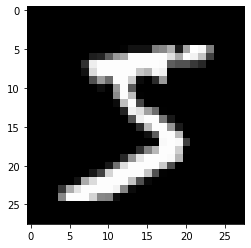

In [21]:
plt.imshow(x_train[0],cmap='gray')

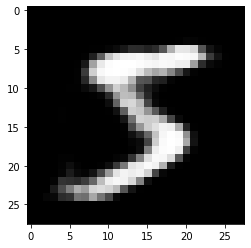

In [10]:
plt.imshow(example[0],cmap="gray")